# Common Pull Request Contributors across different categories in AI/ML space

## Tables of Contents
- [Introduction](#introduction)
- [Database Connection](#connect-to-the-augur-database)
- [Loading the URLs of Repositories](#load-the-urls-of-ai-repositories)
- [Math Repositories](#math-respositories)
  - [Network Graph for the Common Contributors in the Math Repositories](#networkx-graph-for-the-pull-request-contributors-in-the-math-category)
  - [Plotly Graph for the Common Contributors in the Math Repositories](#plotly-graph-for-the-pull-request-contributors-in-the-math-category)
- [Natural Language Processing (NLP) Repositories](#natural-language-processing-respositories)
  - [Network Graph for the Common Contributors in the NLP Repositories](#networkx-graph-for-the-pull-request-common-contributors-in-the-nlp-category)
  - [Plotly Graph for the Common Contributors in the NLP Repositories](#plotly-graph-for-the-pull-request-common-contributors-in-the-nlp-category)
- [Personal Assistant Repositories](#personal-assistant-repositories)
  - [Network Graph for the Common Contributors in the Personal Assistants Repositories](#networkx-graph-for-the-pull-request-common-contributors-in-the-personal-assistants-category)
  - [Plotly Graph for the Common Contributors in the Personal Assistants Repositories](#plotly-graph-for-the-pull-request-common-contributors-in-the-personal-assistants-category)
- [Large Language Model (LLMs) Repositories](#large-language-models-repositories)
  - [Network Graph for the Common Contributors in the LLMs Repositories](#networkx-graph-for-the-pull-request-common-contributors-in-the-LLMs-category)
  - [Plotly Graph for the Common Contributors in the LLMs Repositories](#plotly-graph-for-the-pull-request-common-contributors-in-the-LLMs-category)
- [Generative Artificial Intelligence (GenAI) Repositories](#generative-ai-repositories)
  - [Network Graph for the Common Contributors in the GenAI Repositories](#networkx-graph-for-the-pull-request-common-contributors-in-the-GenAI-category)
  - [Plotly Graph for the Common Contributors in the GenAI Repositories](#plotly-graph-for-the-pull-request-common-contributors-in-the-GenAI-category)
- [Combining All Repositories](#combining-all-categories)
  - [Network Graph for the Common Contributors in all the categories combined](#networkx-graph-for-the-pull-request-common-contributors-in-all-the-categories-combined)
  - [Plotly Graph for the Common Contributors in all the categories combined](#plotly-graph-for-the-pull-request-common-contributors-in-all-the-categories-combined)
- [Takeaways](#takeaways)

## Introduction

## Background
- In the previous notebook [repo_analysis](repo_analysis.ipynb), we plotted graphs by representing both projects and contributors as nodes and saw the relationships between them. To check all the libaries that are being used in this notebook, please check the list of [AI Repos](ai_repos.json).
The list of repositories are manually selected based on the popularity or most commonly used. And the Pull Request Contributions data is gathered using the Augur Database.
- In the laster section of the same notebook, as a proof of concept, we plotted graphs to see the Pull Request common contributors for the math category and observed what repositories have strong connection in terms of common contributors.

### In this notebook, we will extend the work by visualizing the common pull request contributors of the all categories we defined in the field of AI/ML. 

Specifically, we have categorized the repositories into five distinct groups:
- **Mathematics (math)**: This category includes libraries that are foundational for numerical computations, data manipulation, and mathematical operations essential in AI/ML pipelines. Examples include NumPy, TensorFlow, and PyTorch.

- **Natural Language Processing (NLP)**: NLP libraries focus on processing and understanding human language. They provide tools for tasks like tokenization, translation, and sentiment analysis. Notable libraries in this category are Hugging Face’s Transformers, SpaCy, and NLTK.

- **Large Language Models (LLMs)**: This category features libraries and frameworks related to the development and fine-tuning of large-scale language models. Examples include Mistral, Microsoft’s DeepSpeed, and Gemma.

- **Generative AI (gen_ai)**: These libraries focus on creating new content, including text, images, and code. This category includes repositories like LangChain, NVIDIA’s NeMo, and Stable Diffusion.

- **Personal Assistants**: This category includes frameworks that enable the creation of voice-based personal assistants, such as Mycroft, Rhasspy, and Leon.

Import all the necessary libraries.

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the json module to work with JSON data
import json

# Importing specific functions from SQLAlchemy
from sqlalchemy import create_engine

from utils.utils import fetch_repo_ids_and_names, fetch_pr_contributors, get_melted_df, get_contributor_graph, get_common_contributors_count, get_repo_common_contributors, get_plotly_graph, plot_networkx_graph, get_repo_pairs_with_hgighest_common_contributors

## Connect to the Augur database

In [2]:
# Opening the JSON file containing database credentials and loading it into a dictionary
with open("data/il_ai_creds.json") as config_file:
    config = json.load(config_file)
    
# Creating a PostgreSQL database connection string using the credentials from the JSON file
database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(
    config['user'],        # Username
    config['password'],    # Password
    config['host'],        # Hostname
    config['port'],        # Port number
    config['database']     # Database name
)

# Assigning the connection string to a variable
connection_string = database_connection_string

# Creating a SQLAlchemy engine using the connection string
engine = create_engine(connection_string)


## Load the URLs of AI repositories

- There are different verticals like math, nlp, gen_ai, personal_assistants, llm etc
- In this notebook, we are performing our analysis on each of the repositories as graphical interpretation.
- If you want to perform the same analysis on other verticals, just replace math with your choice in `data.get('math')`

In [3]:
# Opening the JSON file containing AI repository data and loading it into a dictionary
f = open('ai_repos.json')
data = json.load(f)

# Closing the file after loading the data
f.close()  

# print the collected repositories
from pprint import pprint
pprint(data)


{'gen_ai': ['https://github.com/lucidrains/imagen-pytorch',
            'https://github.com/langchain-ai/langchain',
            'https://github.com/run-llama/llama_index',
            'https://github.com/microsoft/lora',
            'https://github.com/nvidia/nemo',
            'https://github.com/huggingface/peft',
            'https://github.com/microsoft/semantic-kernel',
            'https://github.com/chroma-core/chroma',
            'https://github.com/milvus-io/milvus',
            'https://github.com/qdrant/qdrant',
            'https://github.com/bigscience-workshop/promptsource',
            'https://github.com/automatic1111/stable-diffusion-webui'],
 'llm': ['https://github.com/huggingface/transformers',
         'https://github.com/huggingface/datasets',
         'https://github.com/huggingface/trl',
         'https://github.com/microsoft/deepspeed',
         'https://github.com/timdettmers/bitsandbytes',
         'https://github.com/mistralai/mistral-common',
         'ht

## Math Respositories

In [4]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('math')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [5]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25495, 25498, 25497, 25501, 25500, 25504, 25503, 25557, 25502, 25499]
['numpy', 'tensorflow', 'networkx', 'pytorch', 'keras-io', 'tinygrad', 'pandas', 'polars', 'arrow', 'mlx']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [6]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145332
1,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145334
2,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145333
3,25495,numpy,https://github.com/numpy/numpy,010000f2-1900-0000-0000-000000000000,145403
4,25495,numpy,https://github.com/numpy/numpy,010295c2-c300-0000-0000-000000000000,145596
...,...,...,...,...,...
210824,25499,mlx,https://github.com/ml-explore/mlx,0100b777-8200-0000-0000-000000000000,3213384
210825,25499,mlx,https://github.com/ml-explore/mlx,010012f3-bb00-0000-0000-000000000000,5178441
210826,25499,mlx,https://github.com/ml-explore/mlx,0100178a-9500-0000-0000-000000000000,3246286
210827,25499,mlx,https://github.com/ml-explore/mlx,0100a3b8-0700-0000-0000-000000000000,40873


In [7]:
df_melted_pr = get_melted_df(pr_contrib)

In [8]:
df_melted_pr.head()

,repo_name,cntrb_id,number
8,tensorflow,01000000-5000-0000-0000-000000000000,3
16,polars,01000000-8900-0000-0000-000000000000,18
26,polars,01000001-fd00-0000-0000-000000000000,1
30,arrow,01000002-3300-0000-0000-000000000000,54
48,tensorflow,01000002-5600-0000-0000-000000000000,3


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [9]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [10]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [11]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Contributors in the Math category

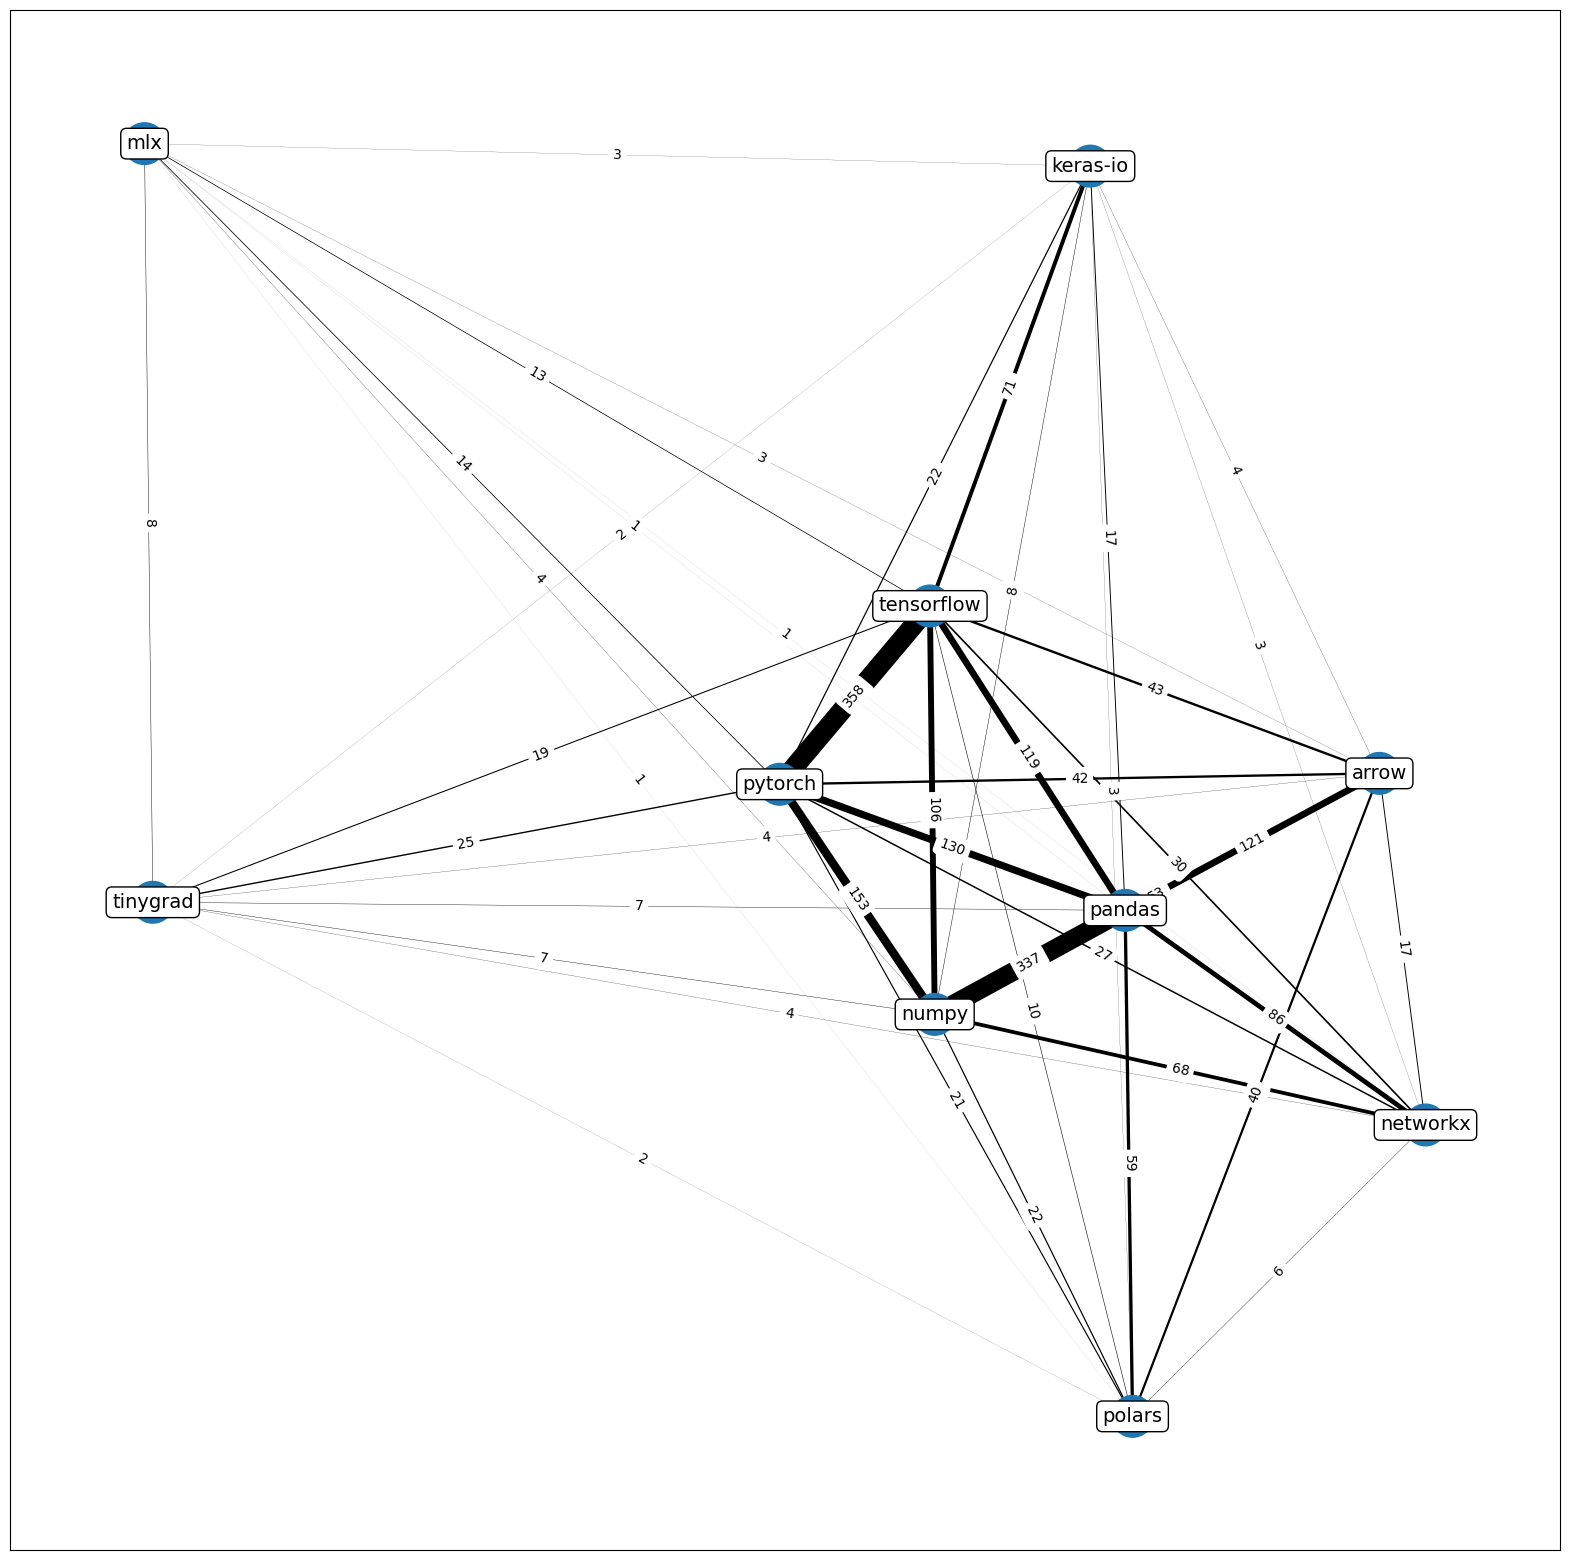

In [12]:
plot_networkx_graph(repo_common_contributors)

### Plotly Graph for the Pull Request Contributors in the Math category

In [13]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

## Natural Language Processing Respositories

In [14]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('nlp')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [15]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25511, 25514, 25515, 25505, 25512, 25516, 25507, 25506, 25510, 25509, 25508, 25513]
['transformers', 'spacy', 'nltk', 'allennlp', 'gensim', 'corenlp', 'deepspeech', 'fasttext', 'sentence-transformers', 'opennmt', 'opennlp', 'cogcomp-nlp']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [16]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25511,transformers,https://github.com/huggingface/transformers,01002233-f000-0000-0000-000000000000,267463
1,25511,transformers,https://github.com/huggingface/transformers,01003870-bf00-0000-0000-000000000000,267894
2,25511,transformers,https://github.com/huggingface/transformers,0102c4f8-8300-0000-0000-000000000000,151151
3,25511,transformers,https://github.com/huggingface/transformers,01015913-8d00-0000-0000-000000000000,151170
4,25511,transformers,https://github.com/huggingface/transformers,01072490-e200-0000-0000-000000000000,151180
...,...,...,...,...,...
31500,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002540-ee00-0000-0000-000000000000,33795
31501,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002540-ee00-0000-0000-000000000000,33791
31502,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002540-ee00-0000-0000-000000000000,33823
31503,25513,cogcomp-nlp,https://github.com/cogcomp/cogcomp-nlp,01002747-4b00-0000-0000-000000000000,33842


In [17]:
df_melted_pr = get_melted_df(pr_contrib)

In [18]:
df_melted_pr.head()

,repo_name,cntrb_id,number
11,transformers,01000000-1100-0000-0000-000000000000,2
16,fasttext,01000002-3c00-0000-0000-000000000000,1
22,spacy,01000002-3c00-0000-0000-000000000000,5
29,gensim,01000004-cf00-0000-0000-000000000000,1
40,fasttext,01000006-6900-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [19]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [20]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [21]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Common Contributors in the NLP category

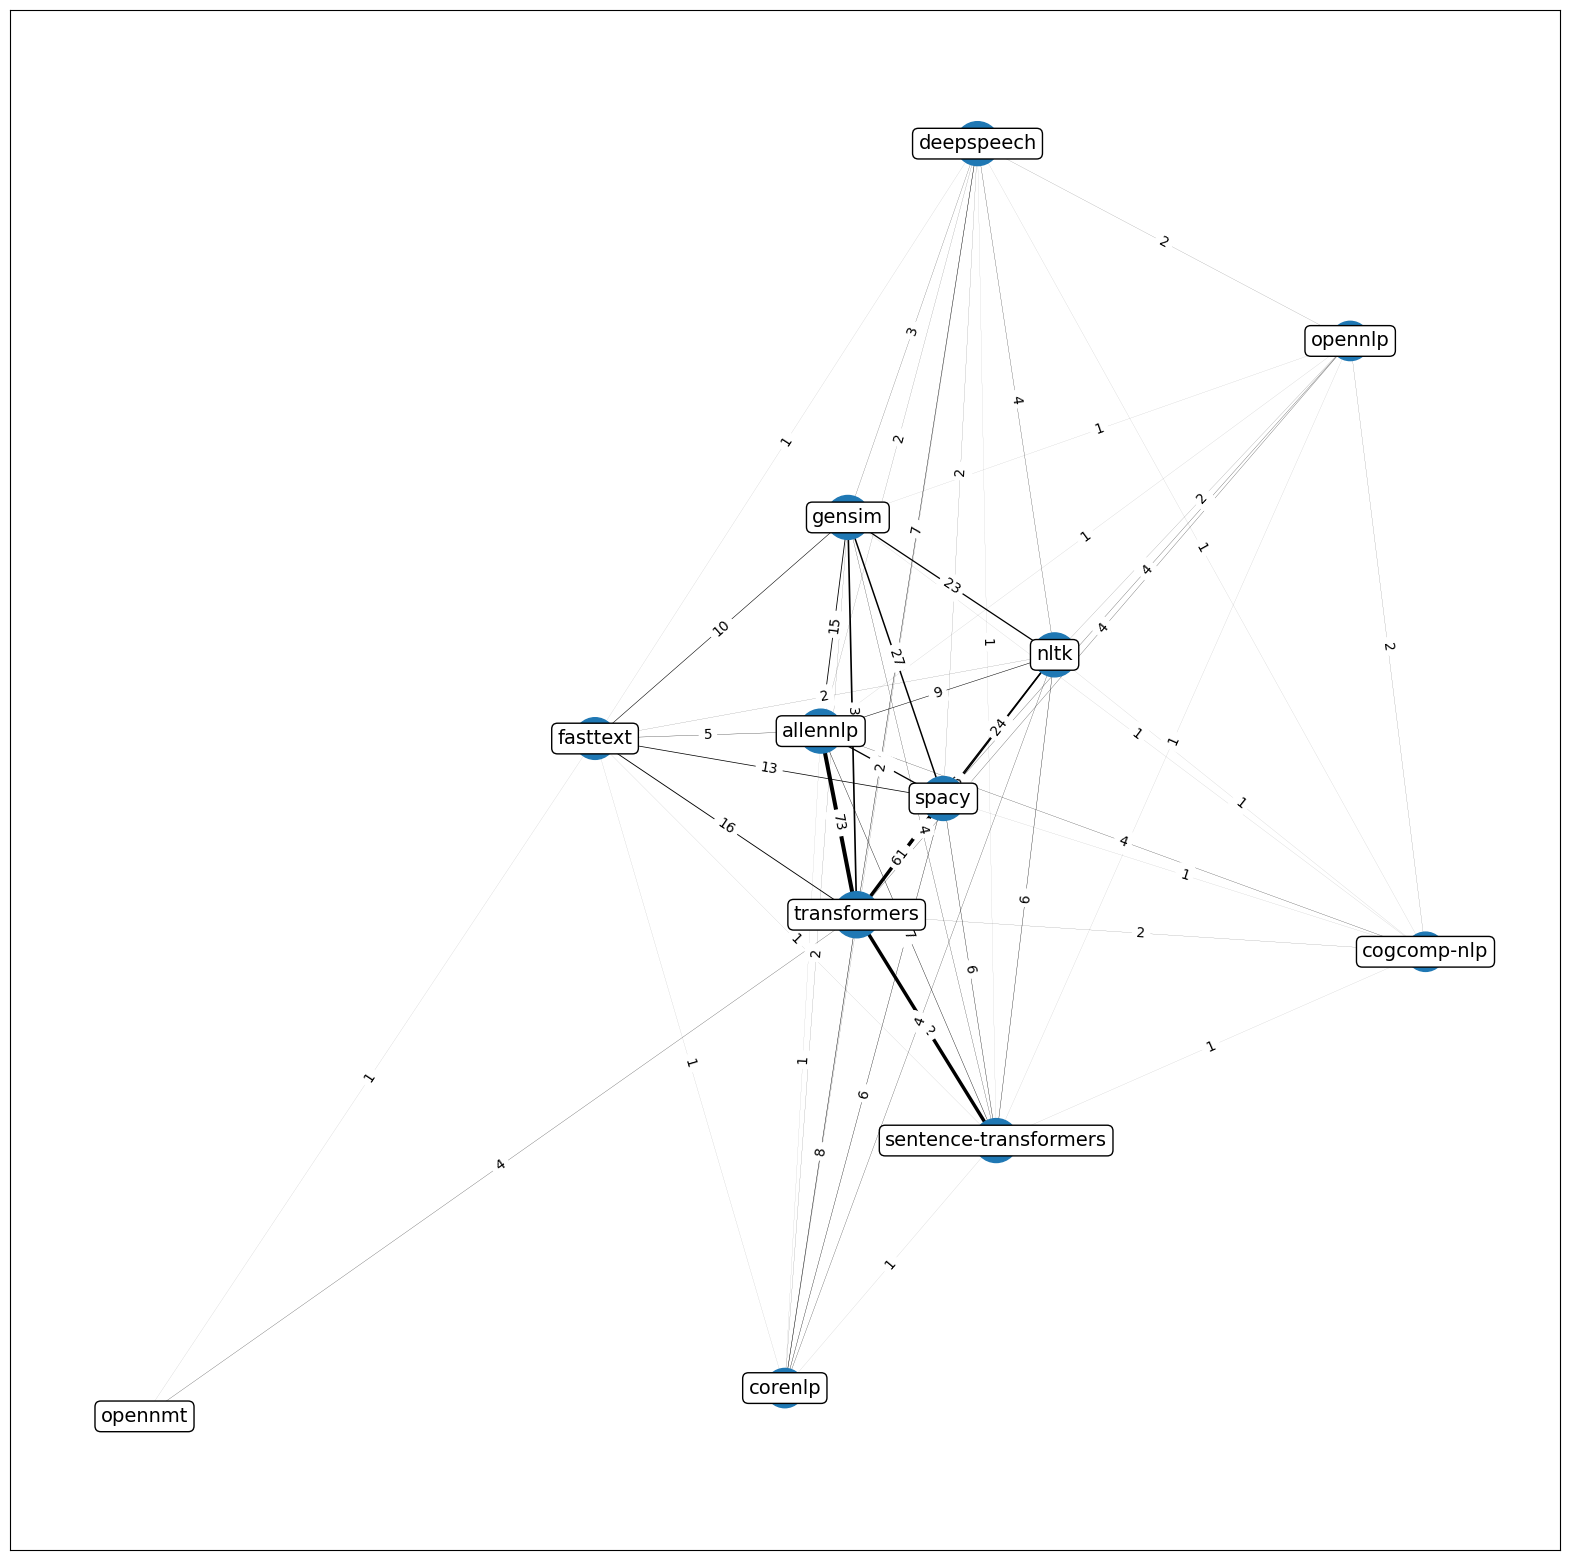

In [22]:
plot_networkx_graph(repo_common_contributors)

### Plotly Graph for the Pull Request Common Contributors in the NLP category

In [23]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

## Personal Assistant Repositories

In [24]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('personal_assistants')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [25]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25518, 25519, 25523, 25522, 25520, 25521, 25517]
['mycroft-core', 'open-assistant', 'rhasspy', 'ovos-core', 'jarvis', 'leon', 'porcupine']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [26]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,0103ff84-cf00-0000-0000-000000000000,45451
1,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,0100f55a-5500-0000-0000-000000000000,46053
2,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,0100f55a-5500-0000-0000-000000000000,46181
3,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,01015061-1300-0000-0000-000000000000,82111
4,25518,mycroft-core,https://github.com/mycroftai/mycroft-core,010017e4-8c00-0000-0000-000000000000,45472
...,...,...,...,...,...
6217,25517,porcupine,https://github.com/picovoice/porcupine,0104eeee-8b00-0000-0000-000000000000,5200400
6218,25517,porcupine,https://github.com/picovoice/porcupine,0102f65a-0500-0000-0000-000000000000,3213479
6219,25517,porcupine,https://github.com/picovoice/porcupine,0102f65a-0500-0000-0000-000000000000,5200402
6220,25517,porcupine,https://github.com/picovoice/porcupine,010023a2-4f00-0000-0000-000000000000,5200403


In [27]:
df_melted_pr = get_melted_df(pr_contrib)

In [28]:
df_melted_pr.head()

,repo_name,cntrb_id,number
3,open-assistant,01000000-e300-0000-0000-000000000000,2
9,mycroft-core,01000004-9400-0000-0000-000000000000,2
16,mycroft-core,01000009-4500-0000-0000-000000000000,1
21,jarvis,01000027-9900-0000-0000-000000000000,31
23,mycroft-core,01000027-9900-0000-0000-000000000000,9


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [29]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [30]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [31]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Common Contributors in the Personal Assistants category

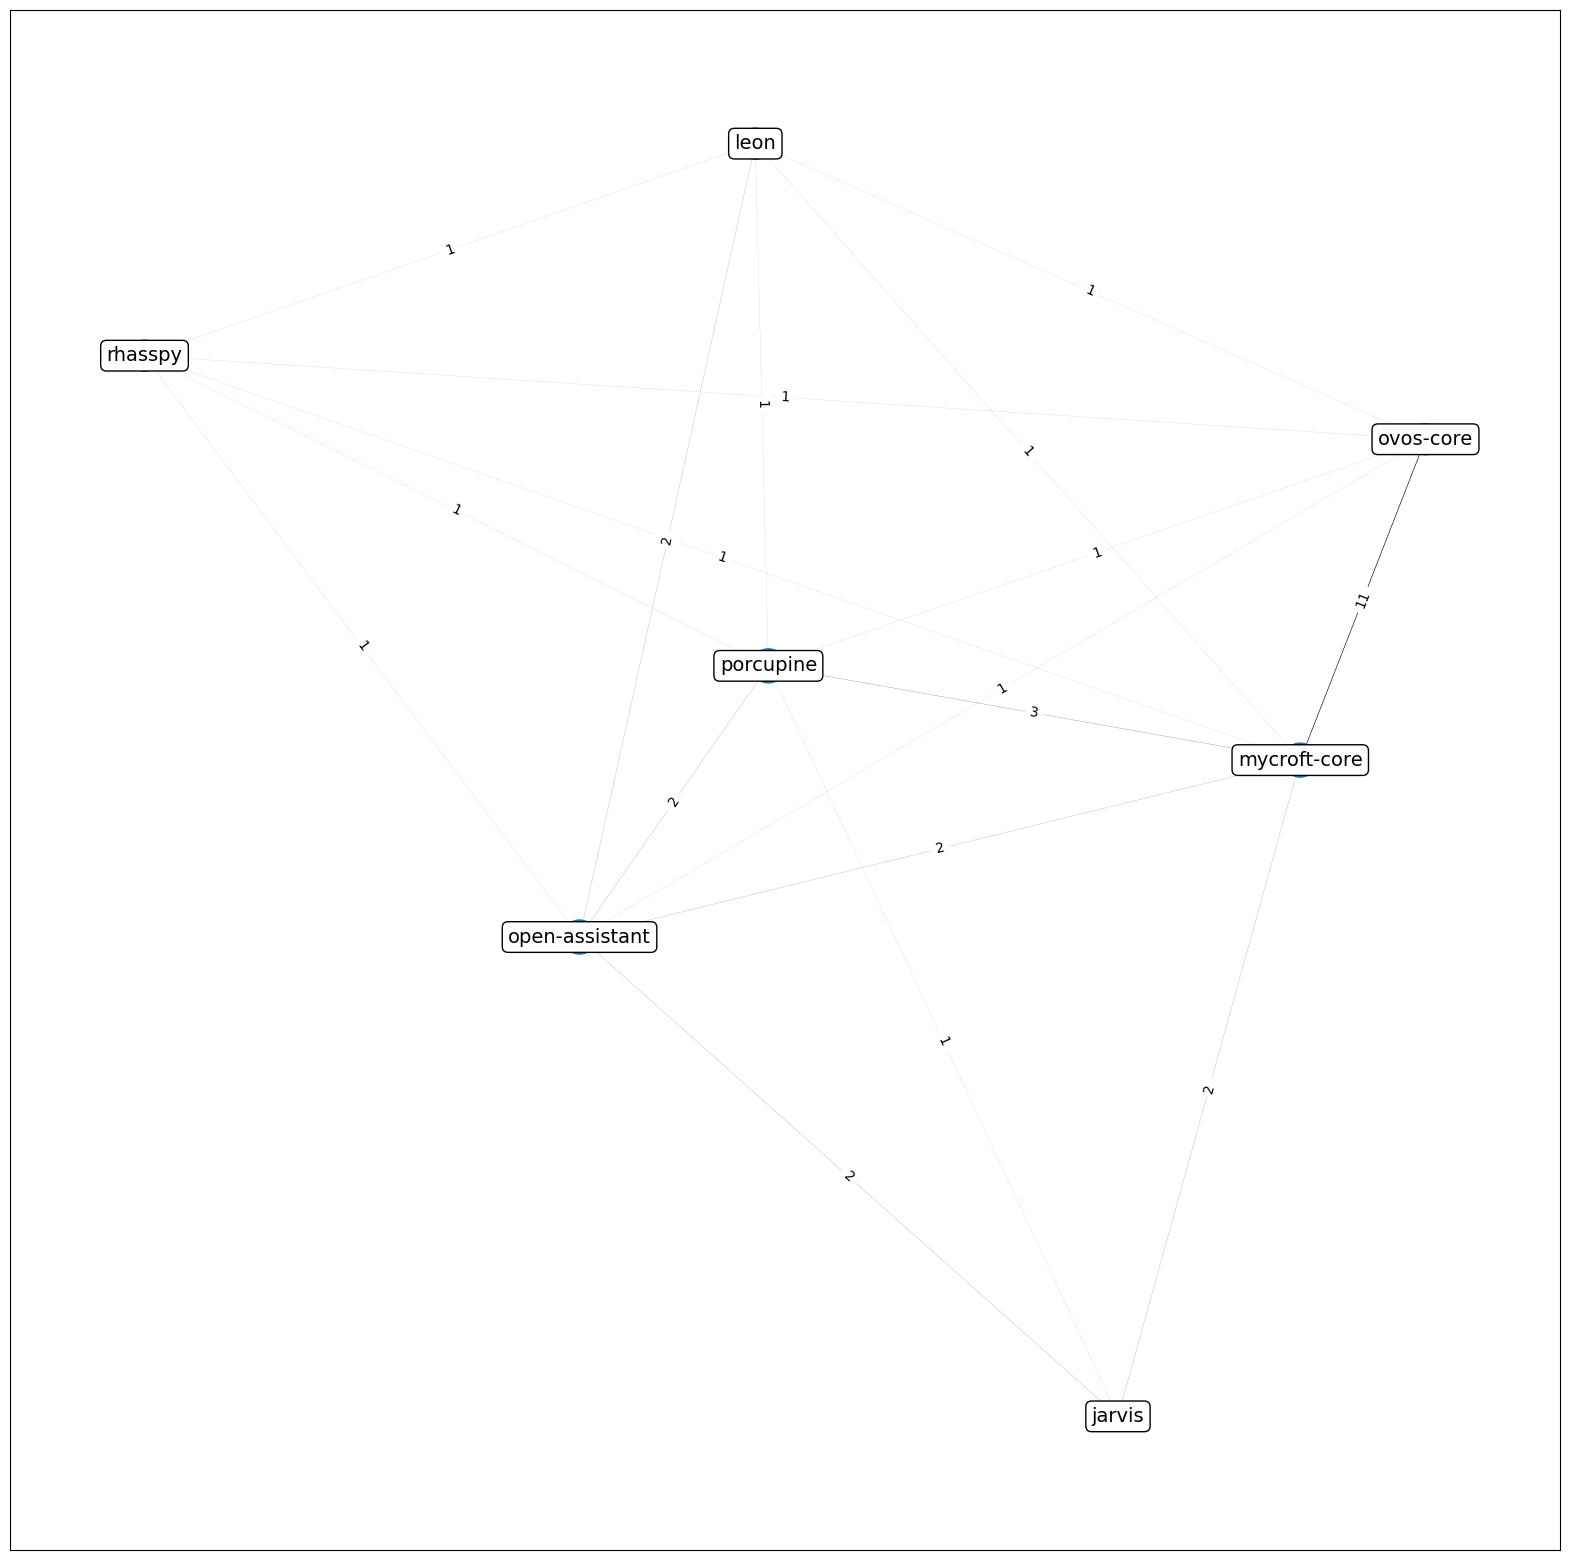

In [32]:
plot_networkx_graph(repo_common_contributors)

### Plotly Graph for the Pull Request Common Contributors in the Personal Assistants category

In [33]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

## Large Language Models Repositories

In [34]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('llm')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [35]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25511, 25533, 25525, 25530, 25524, 25528, 25532, 25529, 25481, 25527]
['transformers', 'datasets', 'trl', 'deepspeed', 'bitsandbytes', 'mistral-common', 'llama', 'text-to-text-transfer-transformer', 'instructlab', 'gemma']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [36]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25511,transformers,https://github.com/huggingface/transformers,01002233-f000-0000-0000-000000000000,267463
1,25511,transformers,https://github.com/huggingface/transformers,01003870-bf00-0000-0000-000000000000,267894
2,25511,transformers,https://github.com/huggingface/transformers,0102c4f8-8300-0000-0000-000000000000,151151
3,25511,transformers,https://github.com/huggingface/transformers,01015913-8d00-0000-0000-000000000000,151170
4,25511,transformers,https://github.com/huggingface/transformers,01072490-e200-0000-0000-000000000000,151180
...,...,...,...,...,...
27520,25527,gemma,https://github.com/google-deepmind/gemma,01006e92-1500-0000-0000-000000000000,32232
27521,25527,gemma,https://github.com/google-deepmind/gemma,01006e92-1500-0000-0000-000000000000,32235
27522,25527,gemma,https://github.com/google-deepmind/gemma,01076655-0100-0000-0000-000000000000,32234
27523,25527,gemma,https://github.com/google-deepmind/gemma,010053ca-df00-0000-0000-000000000000,32236


In [37]:
df_melted_pr = get_melted_df(pr_contrib)

In [38]:
df_melted_pr.head()

,repo_name,cntrb_id,number
8,transformers,01000000-1100-0000-0000-000000000000,2
14,instructlab,01000008-1200-0000-0000-000000000000,2
28,transformers,0100000a-0700-0000-0000-000000000000,2
29,trl,0100000a-0700-0000-0000-000000000000,1
31,datasets,0100000e-0c00-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [39]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [40]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [41]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Common Contributors in the LLMs category

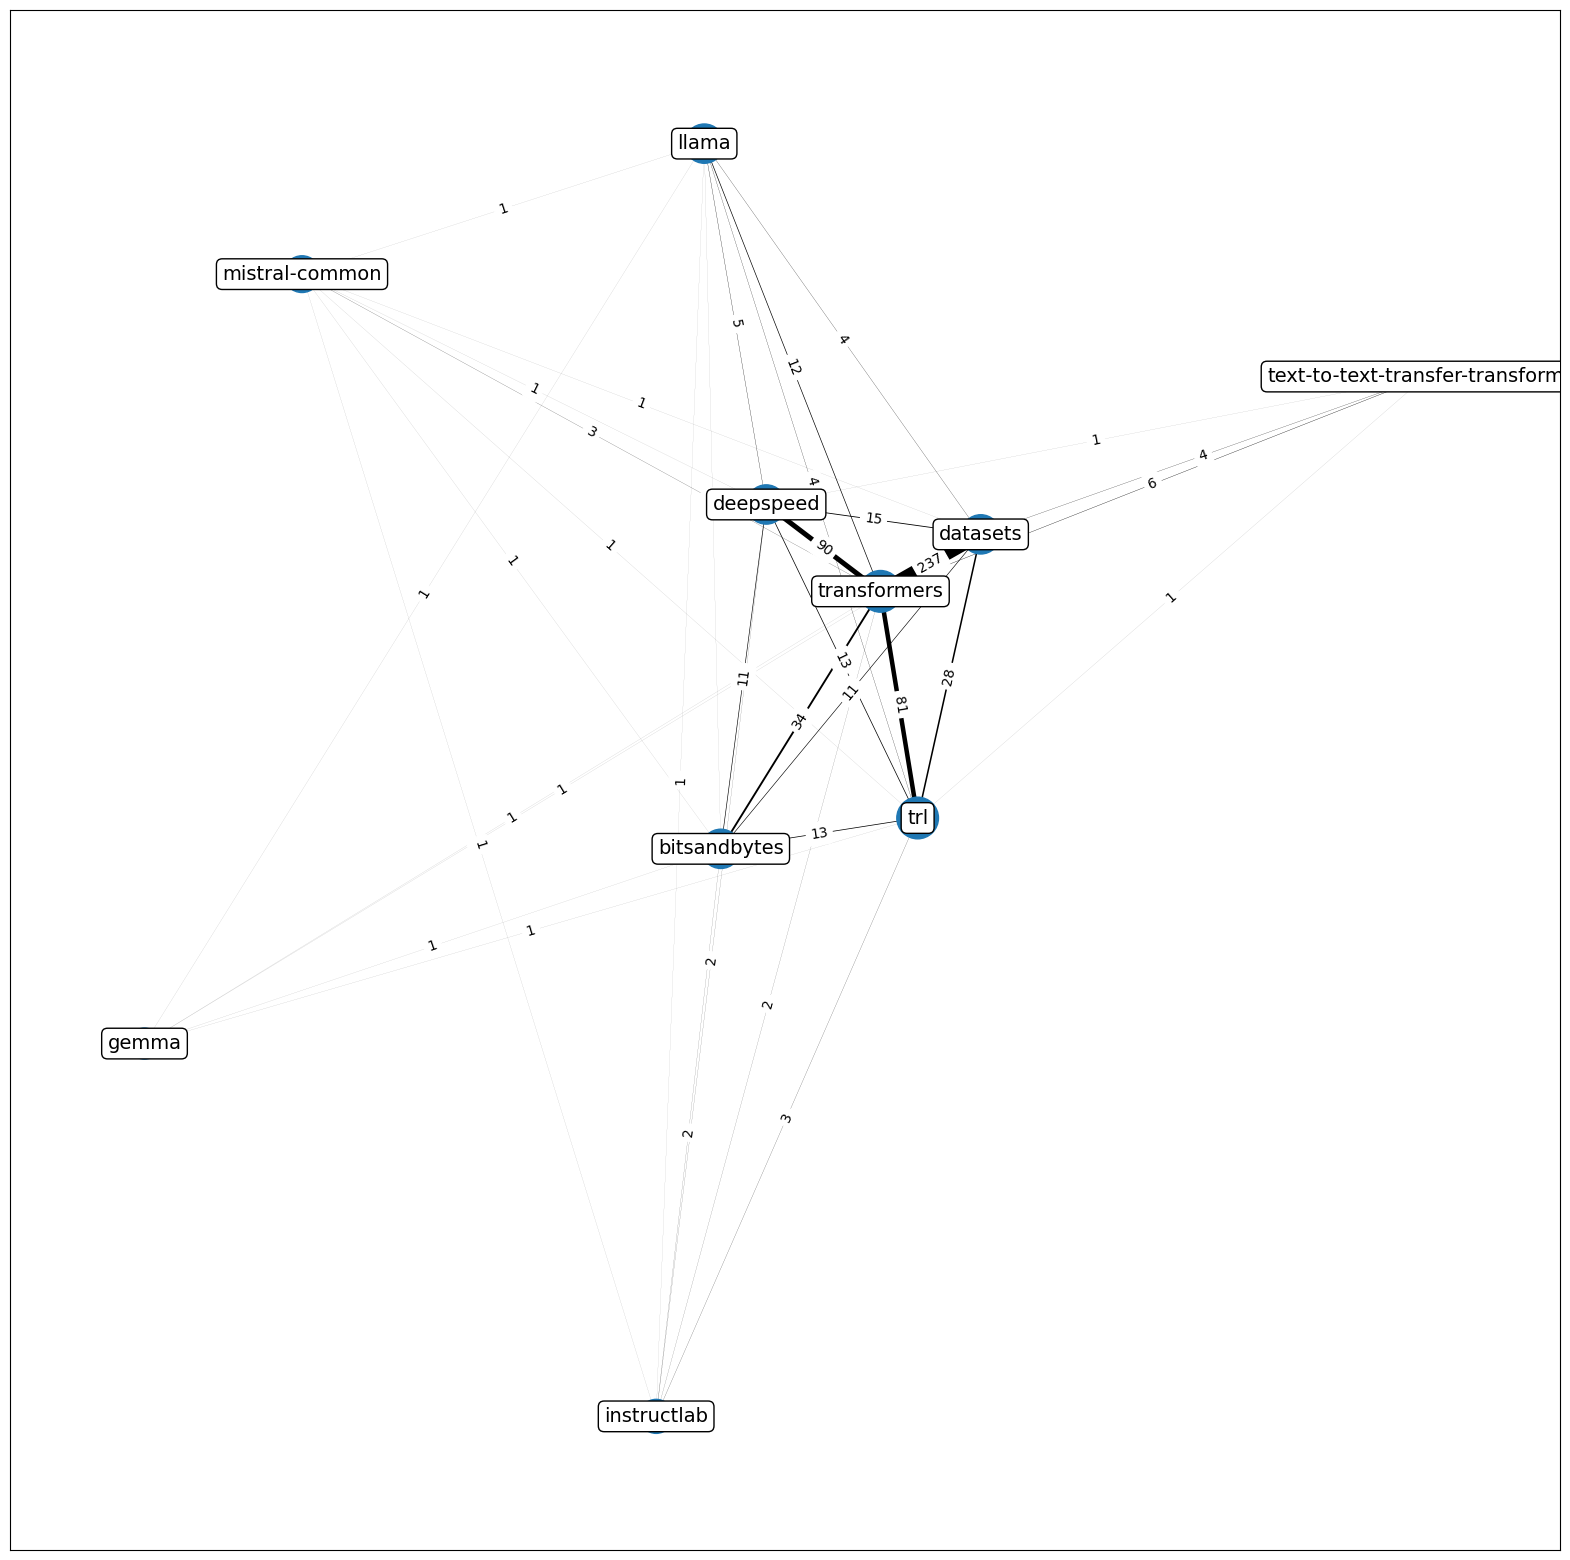

In [42]:
plot_networkx_graph(repo_common_contributors)

### Plotly Graph for the Pull Request Common Contributors in the LLMs category

In [43]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

## Generative AI Repositories

In [44]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

# Extracting the list of repositories under the 'math' category from the loaded JSON data
repo_git_set = data.get('gen_ai')

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [45]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25543, 25541, 25537, 25546, 25534, 25540, 25538, 25545, 25535, 25542, 25536, 25539]
['imagen-pytorch', 'langchain', 'llama_index', 'lora', 'nemo', 'peft', 'semantic-kernel', 'chroma', 'milvus', 'qdrant', 'promptsource', 'stable-diffusion-webui']


### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [46]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,0100cc6a-0d00-0000-0000-000000000000,34225
1,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,01012ee0-f000-0000-0000-000000000000,34226
2,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,0100477e-4800-0000-0000-000000000000,34227
3,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,0102aa79-1700-0000-0000-000000000000,34228
4,25543,imagen-pytorch,https://github.com/lucidrains/imagen-pytorch,01018abc-e000-0000-0000-000000000000,34229
...,...,...,...,...,...
63647,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0105f975-7b00-0000-0000-000000000000,111779
63648,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,01042c97-cf00-0000-0000-000000000000,91043
63649,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100389b-1300-0000-0000-000000000000,112011
63650,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100028c-ff00-0000-0000-000000000000,111722


In [47]:
df_melted_pr = get_melted_df(pr_contrib)

In [48]:
df_melted_pr.head()

,repo_name,cntrb_id,number
2,langchain,01000001-5a00-0000-0000-000000000000,1
15,llama_index,01000001-5b00-0000-0000-000000000000,1
26,langchain,01000002-3c00-0000-0000-000000000000,2
39,llama_index,01000002-6400-0000-0000-000000000000,1
50,langchain,01000004-c300-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [49]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [50]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [51]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Common Contributors in the GenAI category

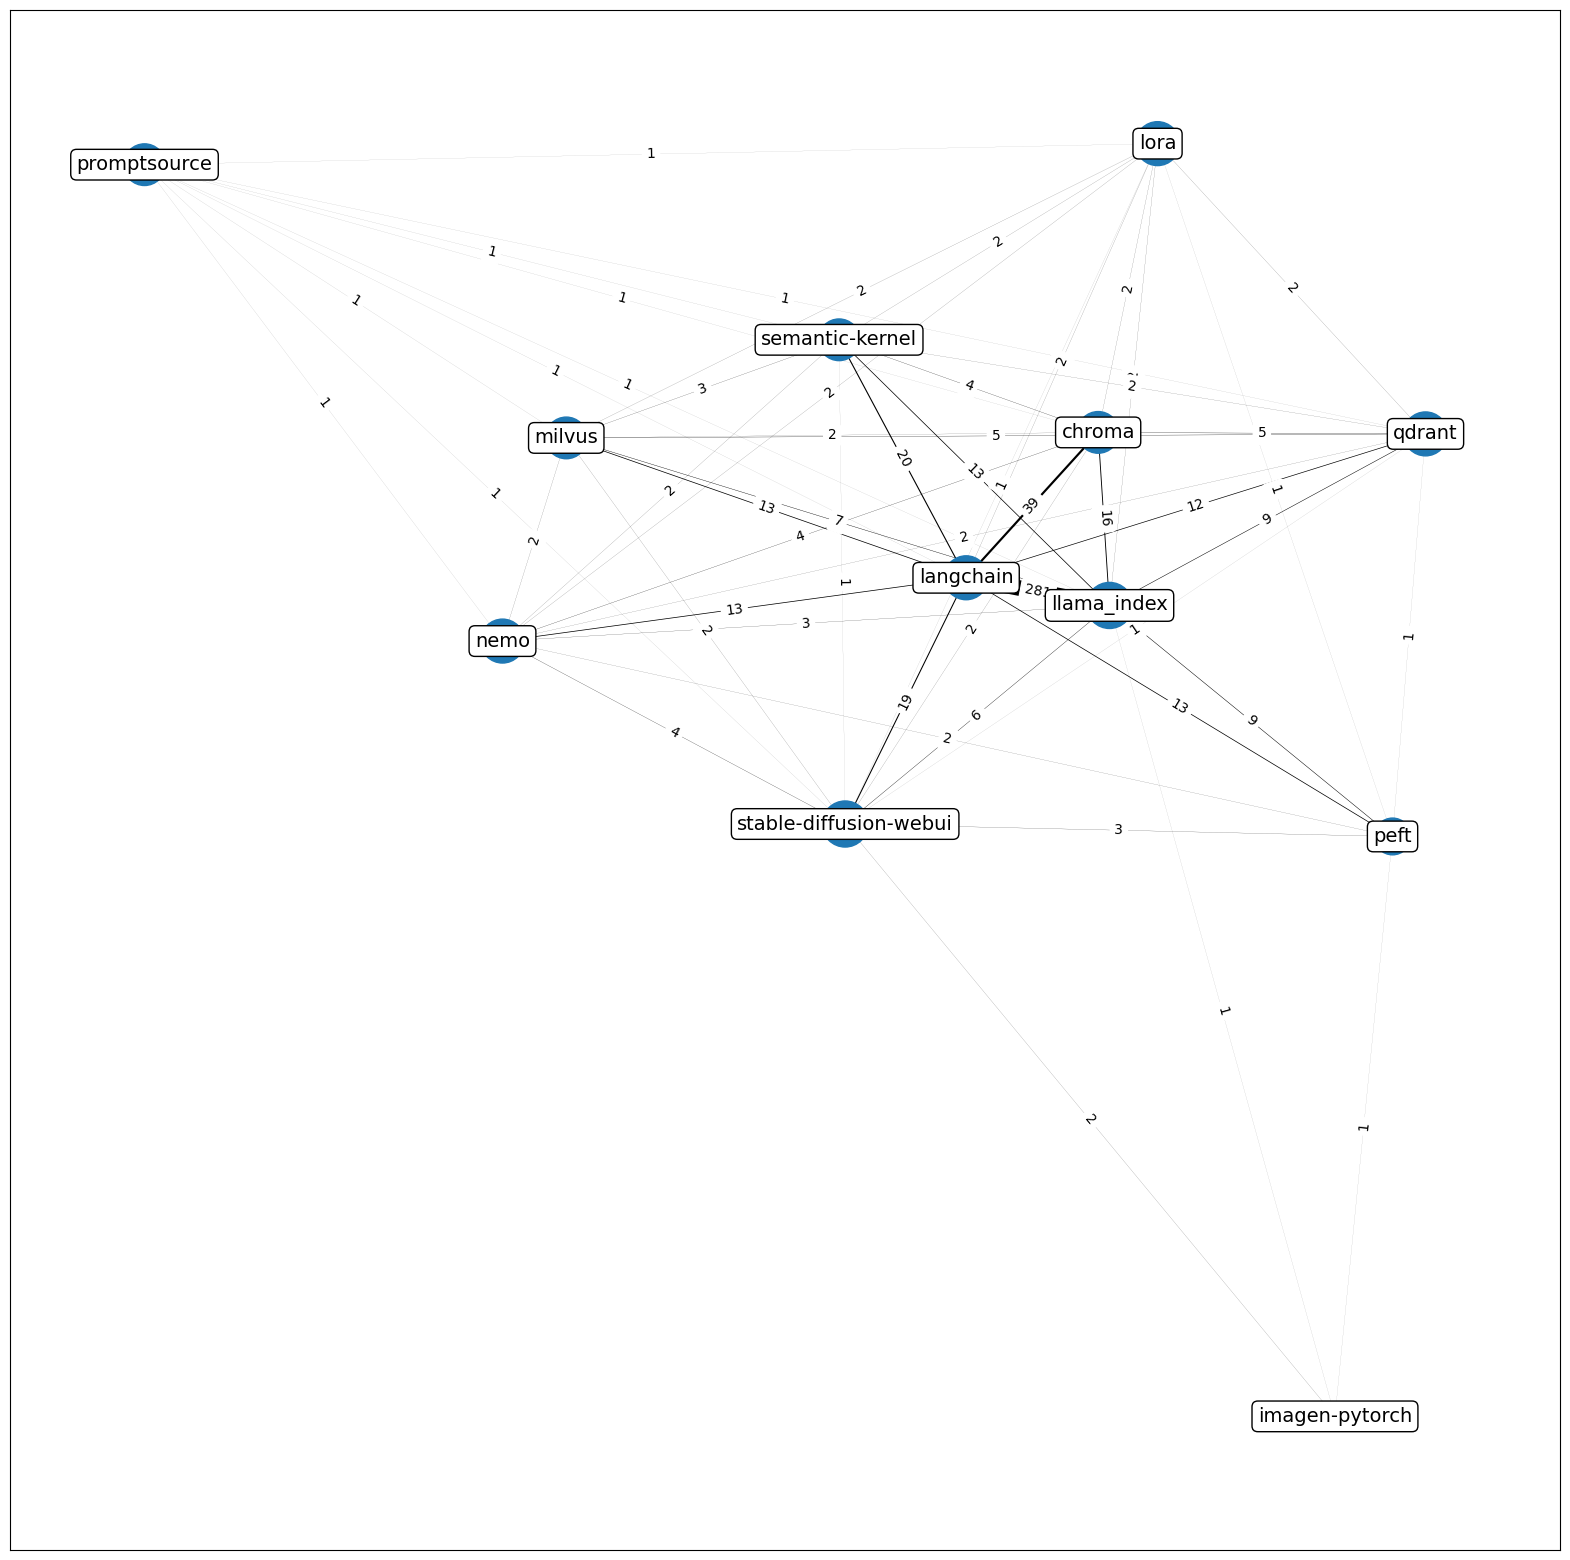

In [52]:
plot_networkx_graph(repo_common_contributors)

### Plotly Graph for the Pull Request Common Contributors in the GenAI category

In [53]:
fig = get_plotly_graph(repo_common_contributors)
fig.show()

## Combining All Categories

In [54]:
# Initializing an empty list to store repository git URLs
repo_git_set = []

for key in data.keys():
    repo_git_set.extend(data.get(key))

### Retrieve the repository IDs and the repository names

Let's retrieve the repository IDs and names from the augur database.

In [55]:
# Initializing empty lists to store repository IDs and names

repo_set, repo_name_set = fetch_repo_ids_and_names(engine, repo_git_set)

# Printing the lists of repository IDs and names
print(repo_set)
print(repo_name_set)

[25495, 25498, 25497, 25501, 25500, 25504, 25503, 25557, 25502, 25499, 25511, 25514, 25515, 25505, 25512, 25516, 25507, 25506, 25510, 25509, 25508, 25513, 25518, 25519, 25523, 25522, 25520, 25521, 25517, 25511, 25533, 25525, 25530, 25524, 25528, 25532, 25529, 25481, 25527, 25543, 25541, 25537, 25546, 25534, 25540, 25538, 25545, 25535, 25542, 25536, 25539]
['numpy', 'tensorflow', 'networkx', 'pytorch', 'keras-io', 'tinygrad', 'pandas', 'polars', 'arrow', 'mlx', 'transformers', 'spacy', 'nltk', 'allennlp', 'gensim', 'corenlp', 'deepspeech', 'fasttext', 'sentence-transformers', 'opennmt', 'opennlp', 'cogcomp-nlp', 'mycroft-core', 'open-assistant', 'rhasspy', 'ovos-core', 'jarvis', 'leon', 'porcupine', 'transformers', 'datasets', 'trl', 'deepspeed', 'bitsandbytes', 'mistral-common', 'llama', 'text-to-text-transfer-transformer', 'instructlab', 'gemma', 'imagen-pytorch', 'langchain', 'llama_index', 'lora', 'nemo', 'peft', 'semantic-kernel', 'chroma', 'milvus', 'qdrant', 'promptsource', 'stab

### Retrieve Pull Request Contributors

Any type of contribution can be taken to retrieve data to create networkx and plotly graphs. Here, we are fetching all the Pull Request contributors for various repositories.

In [56]:
# Initializing an empty DataFrame to store pull request contributions
pr_contrib = pd.DataFrame()

# Iterating through the list of repository IDs
for repo_id in repo_set:
    # Skipping if repo_id is None
    if not repo_id:
        continue
    
    df_current_repo = fetch_pr_contributors(engine, repo_id)
    
    # Concatenating the current repository's data with the main DataFrame
    pr_contrib = pd.concat([pr_contrib, df_current_repo])

# Resetting the index of the DataFrame
pr_contrib = pr_contrib.reset_index()

# Dropping the old index column
pr_contrib.drop("index", axis=1, inplace=True)

# Renaming the columns of the DataFrame
pr_contrib.columns = ['repo_id', 'repo_name', 'repo_git', 'cntrb_id', 'pull_request_id']

# Displaying the DataFrame
display(pr_contrib)

,repo_id,repo_name,repo_git,cntrb_id,pull_request_id
0,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145332
1,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145334
2,25495,numpy,https://github.com/numpy/numpy,0100012d-d800-0000-0000-000000000000,145333
3,25495,numpy,https://github.com/numpy/numpy,010000f2-1900-0000-0000-000000000000,145403
4,25495,numpy,https://github.com/numpy/numpy,010295c2-c300-0000-0000-000000000000,145596
...,...,...,...,...,...
339728,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0105f975-7b00-0000-0000-000000000000,111779
339729,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,01042c97-cf00-0000-0000-000000000000,91043
339730,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100389b-1300-0000-0000-000000000000,112011
339731,25539,stable-diffusion-webui,https://github.com/automatic1111/stable-diffus...,0100028c-ff00-0000-0000-000000000000,111722


In [57]:
df_melted_pr = get_melted_df(pr_contrib)

In [58]:
df_melted_pr.head()

,repo_name,cntrb_id,number
48,transformers,01000000-1100-0000-0000-000000000000,4
95,tensorflow,01000000-5000-0000-0000-000000000000,3
135,polars,01000000-8900-0000-0000-000000000000,18
179,open-assistant,01000000-e300-0000-0000-000000000000,2
216,langchain,01000001-5a00-0000-0000-000000000000,1


Let's construct a dictionary called `contributorGraph` from the DataFrame `df_melted_pr`. The purpose of this dictionary is to map each contributor (cntrb_id) to a list of repositories (repo_name) they have contributed to.

In [59]:
contributorGraph = get_contributor_graph(df_melted_pr)

Let's calculates the number of common contributors for each pair of repositories based on the data in the `contributorGraph` dictionary.

In [60]:
commonRepoContributorsCount = get_common_contributors_count(contributorGraph)

Let's create a list of tuples called `repo_common_contributors` that contains the pairs of repository names and the count of common contributors between them.

In [61]:
repo_common_contributors = get_repo_common_contributors(commonRepoContributorsCount)

### Networkx Graph for the Pull Request Common Contributors in all the categories combined

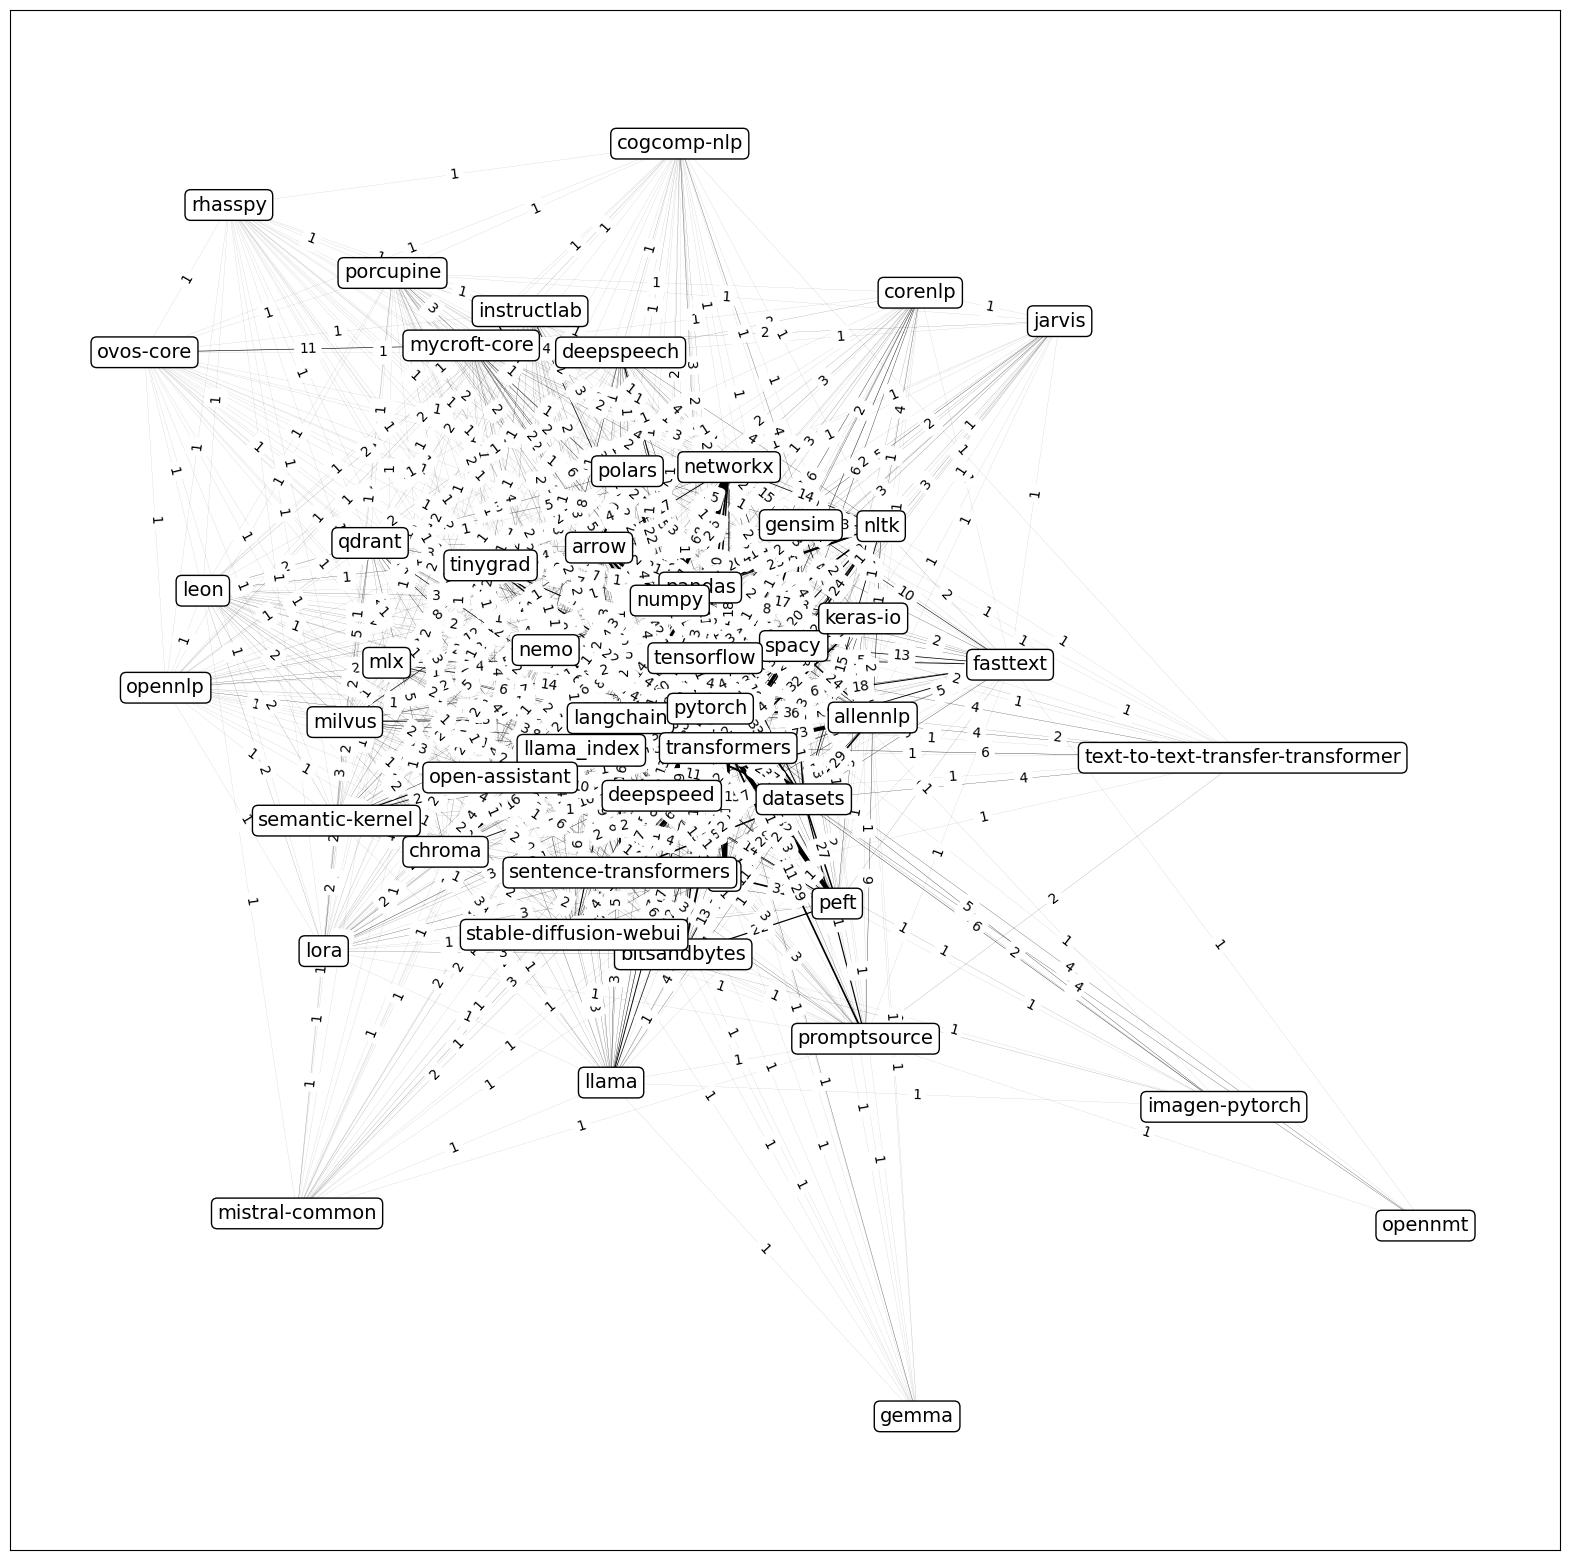

In [62]:
plot_networkx_graph(repo_common_contributors, node_size_factor=10)

### Plotly Graph for the Pull Request Common Contributors in all the categories combined

In [63]:
fig = get_plotly_graph(repo_common_contributors, node_size_factor=5)
fig.show()

Let's try to visualize the top repository pairs with highest common contributors.

In [64]:
fig = get_repo_pairs_with_hgighest_common_contributors(repo_common_contributors)
fig.show()

## Takeaways

### 1. **Math**:
   - **PyTorch & TensorFlow**: These two repositories fall under the math category. Their high number of common contributors suggests that many developers are working on core machine learning and deep learning tasks.
   - **Pandas & PyTorch**: This pair reflects contributions to both a data manipulation library and a machine learning framework, emphasizing the interdependence of data preprocessing and model training.

### 2. **NLP**:
   - **Transformers & Spacy**: Both are major libraries in the NLP space, with Transformers being widely used for various NLP tasks and Spacy for text processing. The overlap in contributors highlights the interconnected nature of NLP tool development.
   - **Gensim & Transformers**: Gensim is focused on topic modeling and document similarity, while Transformers is used for more advanced NLP tasks. The overlap indicates collaboration on NLP tasks ranging from basic to cutting-edge.

### 3. **Personal Assistants**:
   - No direct pair from this category is represented in the top contributors, which might suggest that this area has a more specialized set of contributors, separate from the broader machine learning and NLP communities.

### 4. **LLM (Large Language Models)**:
   - **Transformers & TRL**: Both repositories are critical in the training and deployment of large language models (LLMs). Transformers provide the models, while TRL (Training with Reinforcement Learning) facilitates advanced fine-tuning techniques.
   - **Transformers & Datasets**: Hugging Face’s Transformers and Datasets are commonly used together for training LLMs, explaining the high overlap in contributors.

### 5. **Gen AI (Generative AI)**:
   - **LangChain & Transformers**: These libraries are used for creating and managing generative AI pipelines, including LLMs and generative models. The common contributors likely focus on AI model orchestration and deployment.
   - **Nemo & PyTorch**: NVIDIA’s NeMo and PyTorch are both crucial in the development of generative AI models, especially in speech and language domains. The overlap indicates significant collaboration in this area.
   - **Chroma & LangChain**: Chroma, a vector database, and LangChain, an AI framework, are increasingly being used together for retrieval-augmented generation tasks, which is evident from the shared contributor base.

### Summary:
- **Cross-Category Contributions**: Some repositories, like **Transformers** and **PyTorch**, span multiple categories which is reflected in their frequent appearance in top contributor pairs. This suggests that these libraries are foundational across different domains in AI/ML.

These insights highlight how certain libraries and tools are central to multiple areas of AI/ML, serving as a common ground for contributors from diverse domains.